In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool as sp

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

In [4]:
L = 10

In [5]:
sigma = utils.binary_combinations(L, exclude_all_zeros=True)
sigma = sigma/sigma.sum(axis=1, keepdims=1)

### Costs

In [6]:
chi = 0.5

In [7]:
xi = 0.1

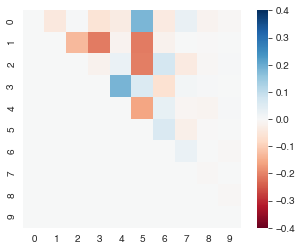

In [8]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

In [9]:
T_total    = 1e6
T_envcycle = T_total/10

In [10]:
rho_0 = 1

In [11]:
# alpha = 0.1

# theta = (2*np.pi)/T_envcycle
# theta = np.random.normal(theta, theta*0.05, size=L)

# phi   = (T_envcycle/L)*np.array(range(L))
# phi   = phi + np.random.normal(0, 0.05*phi)

In [12]:
# rho_series, t_rho = utils.sinusoid_series(T=2*T_total, dt=1, L=L, amplitude=alpha, period=theta, phase=phi, shift=rho_0, return_interp=False)

In [13]:
# rho = scipy.interpolate.interp1d(t_rho, rho_series)

In [14]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 4))
# for i in range(L):
#     ax.plot(t_rho[t_rho < T_total], rho_series[i, t_rho < T_total]) 
# ax.plot(t_rho[t_rho < T_total], rho_series[:, t_rho < T_total].sum(axis=0) - L, color='k')
# plt.show()

In [15]:
# stop

--------
#### Brownian

In [16]:
# l   = 1e-3
# k   = 1e-8
# eps = 1e-8

## Generate strain pool

In [17]:
orig_system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, mu=1e-10,
                                                      binarize_traits_J_cost_terms=True), 
                                     resource_set=ResourceSet(num_resources=L, rho=rho_0), 
                                     N_init=1, R_init=1, convergent_lineages=False)

In [20]:
strain_pool, rep_comms = sp.generate_strain_pool_brownian_envs(orig_system, rep_communities=10, 
                                                               brownian_args={'lamda': 1e-3, 'k': 1e-8, 'eta_std': 0, 'y0': 1}, 
                                                               run_T=1e3)

Running dynamics for rep community 1/10
Running dynamics for rep community 2/1047 114/697*(6970)]	
Running dynamics for rep community 3/1096 102/626*(6260)]	
Running dynamics for rep community 4/1059 134/720*(7200)]	
Running dynamics for rep community 5/1078 108/719*(7190)]	
Running dynamics for rep community 6/1040 112/741*(7410)]	
Running dynamics for rep community 7/1045 125/747*(7470)]	
Running dynamics for rep community 8/1052 123/672*(6720)]	
Running dynamics for rep community 9/1059 109/741*(7410)]	
Running dynamics for rep community 10/109 116/774*(7740)]	


IndexError: invalid index to scalar variable.

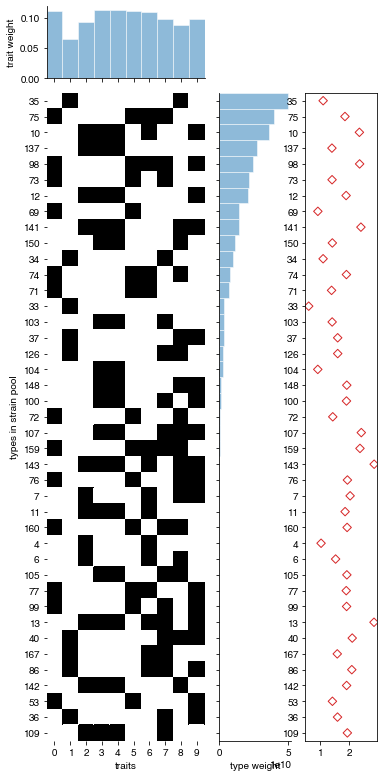

In [21]:
viz.strainpool_plot(strain_pool, type_weights=strain_pool.N)

In [ ]:
stop

In [ ]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                resource_set=ResourceSet(num_resources=L, rho=rho), 
                                N_init=1, R_init=1, convergent_lineages=False)

In [ ]:
system.run(T=T_total)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=True, apply_palette_depth=1, t_max=1e6, log_x_axis=False)

In [ ]:
# stop

---------
---------

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

t0 = T_envcycle 
# t0 = get_max_diversity_t(system)

tf_vals = np.arange(0, T_total-t0, 5e3)

phylo_depths = range(1, L+1)
for d, phylo_depth in enumerate(phylo_depths):
    
    # rand_cggroup = trait_subsets[np.random.choice(range(len(trait_subsets)))]
    rand_cggroup = list(range(d+1))
    print("rand_cggroup:", rand_cggroup)
    traitgroup_persistences = []
    plot_tfs = []
    for i, tf in enumerate(tf_vals):
        if(t0+tf > T_total):
            break
        traitgroup_persistences.append( cg.functional_group_turnover(system, trait_subset=rand_cggroup, t0=t0, tf=t0+tf, inverse=True) )        
        plot_tfs.append(t0+tf)
    ax.plot(plot_tfs, traitgroup_persistences, label=f"trait cg{d+1}", color='tab:purple', alpha=1/len(rand_cggroup)**0.75)
    
    phylogroup_persistences = []
    plot_tfs = []
    for i, tf in enumerate(tf_vals):
        if(t0+tf > T_total):
            break
        phylogroup_persistences.append( cg.phylogenetic_group_turnover(system, phylogeny_depth=phylo_depth, t0=t0, tf=t0+tf, inverse=True) )
        plot_tfs.append(t0+tf)
    ax.plot(plot_tfs, phylogroup_persistences, label=f"phylo d{phylo_depth}", color='tab:green', alpha=1/(d+1))
        
# ax.axvline(T_envcycle, color='k', ls='--', lw=1, zorder=-1)
for j in range(int(T_total/T_envcycle)):
    ax.axvline(j*T_envcycle, color='k', alpha=0.5, ls='--', lw=1, zorder=-1)
    
ax.set_xscale('log')
ax.set_ylim(0, 1.02)
# ax.axhline(0)
ax.legend(ncol=2)
sns.despine()

--------
-------

---------
---------